# AutoSketch
**A U-NET autoencoder model that converts original image into sketche**

**Importing necessary Libraries**

In [1]:
!pip install git+https://github.com/keras-team/keras-preprocessing.git
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from keras_preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2 as cv
from tqdm import tqdm 
import os
import re

  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-73e04lel
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-73e04lel
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-py3-none-any.whl size=43632 sha256=ce54576f3e9dc50dd3c2c16e690714f710499877b246fca2c564a7eef3a668a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-14l5_bs5/wheels/72/0b/c7/3f6b26f2d789c712867e02502e1f1b740091f8615f32a9f870
Successfully built Keras-Preprocessing


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

**Sorting images in proper order**

In [3]:
SIZE = 256

image_path = '/kaggle/input/cuhk-face-sketch-database-cufs/photos'
image_array = []

sketch_path = '/kaggle/input/cuhk-face-sketch-database-cufs/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

**Data Augumentation**

In [4]:
for i in tqdm(image_file):
    image = cv.imread(image_path + '/' + i,1)
    
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    image = cv.resize(image, (SIZE, SIZE))
    
    image = image.astype('float32') / 255.0
    
    image_array.append(img_to_array(image))
    
    img1 = cv.flip(image,1)
    image_array.append(img_to_array(img1))
    
    img2 = cv.flip(image,-1)
    image_array.append(img_to_array(img2))
    
    img3 = cv.flip(image,-1)
    img3 = cv.flip(img3,1)
    image_array.append(img_to_array(img3))
    
    img4 = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)
    image_array.append(img_to_array(img4))
    
    img5 = cv.flip(img4,1)
    image_array.append(img_to_array(img5))
    
    img6 = cv.rotate(image, cv.ROTATE_90_COUNTERCLOCKWISE)
    image_array.append(img_to_array(img6))
    
    img7 = cv.flip(img6,1)
    image_array.append(img_to_array(img7))

100%|██████████| 188/188 [00:01<00:00, 100.82it/s]


In [5]:
for i in tqdm(sketch_file):
    image = cv.imread(sketch_path + '/' + i,1)
    
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    image = cv.resize(image, (SIZE, SIZE))
    
    image = image.astype('float32') / 255.0
    
    sketch_array.append(img_to_array(image))
    
    img1 = cv.flip(image,1)
    sketch_array.append(img_to_array(img1))
    
    img2 = cv.flip(image,-1)
    sketch_array.append(img_to_array(img2))
    
    img3 = cv.flip(image,-1)
    img3 = cv.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    
    img4 = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    
    img5 = cv.flip(img4,1)
    sketch_array.append(img_to_array(img5))
    
    img6 = cv.rotate(image, cv.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    
    img7 = cv.flip(img6,1)
    sketch_array.append(img_to_array(img7))

100%|██████████| 188/188 [00:01<00:00, 105.32it/s]


In [6]:
print("Size of image array: ", len(image_array))
print("Size of sketch array: ", len(sketch_array))

Size of image array:  1504
Size of sketch array:  1504


**Plotting Image and its Sketche**

In [7]:
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches)
   
    plt.show()

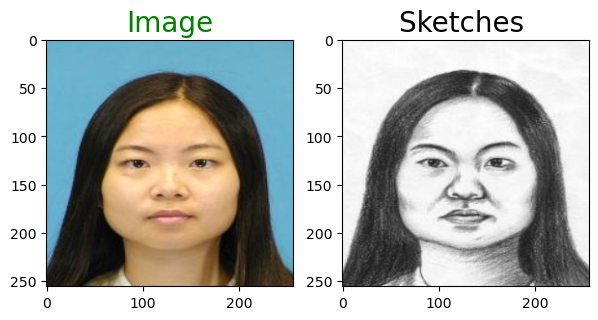

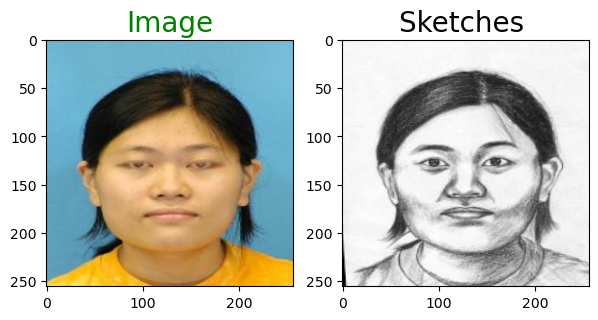

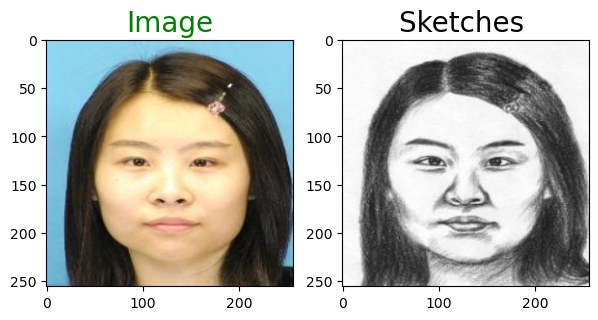

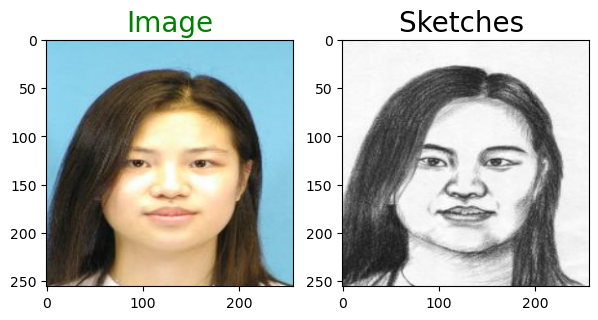

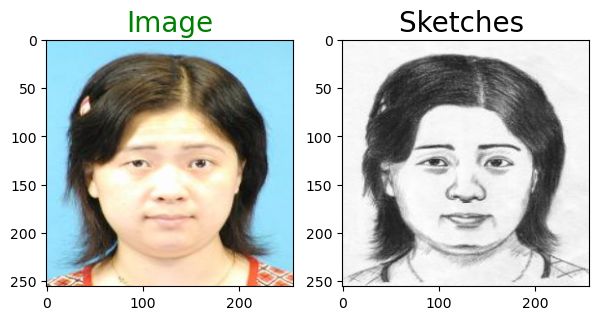

In [8]:
for i in range(0,40,8):
    plot_images(image_array[i],sketch_array[i])

**Train Test Split of data**

In [9]:
train_sketch_image = sketch_array[:1400]
train_image = image_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = image_array[1400:]


train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))

test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))

print('Train color image shape:',train_image.shape)
print('Test color image shape',test_image.shape)

Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


**Model Creation**

In [10]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample

In [11]:
def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:        
#       upsample.dropout(0.2)
        upsample.add(Dropout(0.1))
    upsample.add(keras.layers.LeakyReLU())
    return upsample

In [12]:
def model():
    inputs = layers.Input(shape= [SIZE,SIZE,3])
    d1 = down(128,(3,3),False)(inputs)
    d2 = down(128,(3,3),False)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(512,(3,3),True)(d3)
    
    d5 = down(512,(3,3),True)(d4)

    u1 = up(512,(3,3),True)(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),True)(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),True)(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),True)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),True)(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)

**Model Instantiation**

In [13]:
model = model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 128, 128, 12  3584        ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 sequential_1 (Sequential)      (None, 64, 64, 128)  147584      ['sequential[0][0]']             
                                                                                              

**Model Training**

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

model.fit(train_image, train_sketch_image, epochs = 50 ,batch_size = 50, verbose = 1)

Epoch 1/50


2023-07-25 13:14:27.024908: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/sequential_5/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


28/28 [==============================] - 26s 371ms/step - loss: 0.6111 - acc: 0.3181
Epoch 2/50
28/28 [==============================] - 10s 363ms/step - loss: 0.2623 - acc: 0.3117
Epoch 3/50
28/28 [==============================] - 10s 361ms/step - loss: 0.2013 - acc: 0.3547
Epoch 4/50
28/28 [==============================] - 10s 369ms/step - loss: 0.1768 - acc: 0.3571
Epoch 5/50
28/28 [==============================] - 10s 363ms/step - loss: 0.1598 - acc: 0.3693
Epoch 6/50
28/28 [==============================] - 10s 365ms/step - loss: 0.1488 - acc: 0.3633
Epoch 7/50
28/28 [==============================] - 10s 372ms/step - loss: 0.1372 - acc: 0.3675
Epoch 8/50
28/28 [==============================] - 10s 369ms/step - loss: 0.1291 - acc: 0.3534
Epoch 9/50
28/28 [==============================] - 10s 364ms/step - loss: 0.1232 - acc: 0.3531
Epoch 10/50
28/28 [==============================] - 10s 369ms/step - loss: 0.1156 - acc: 0.3503
Epoch 11/50
28/28 [==============================]

**Model Evaluation**

In [20]:
prediction_on_test_data = model.evaluate(test_image, test_sketch_image)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1))

4/4 [==============================] - 0s 65ms/step - loss: 0.0827 - acc: 0.4643
Loss:  0.08271829783916473
Accuracy:  46.4


**Image vs Actual Sketch vs Predicted Sketch**

In [27]:
def plot_images(image,sketches,predicted):
    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,3,2)
    plt.title('Sketch ', color = 'black', fontsize = 20)
    plt.imshow(sketches)
    plt.subplot(1,3,3)
    plt.title('Predicted ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

1/1 [==============================] - 0s 20ms/step


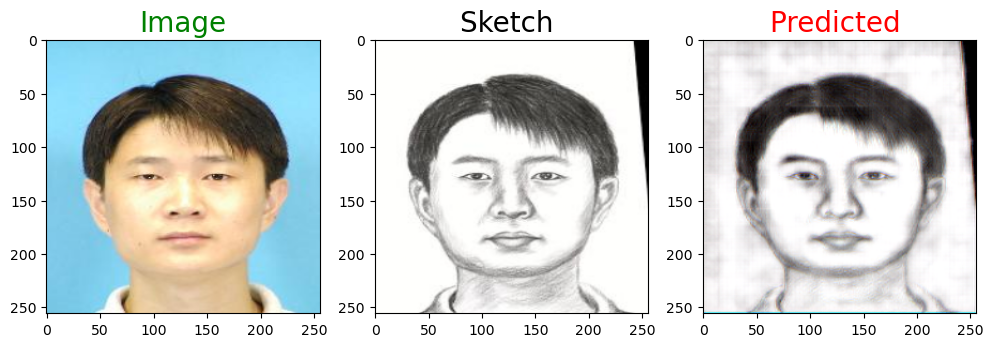

1/1 [==============================] - 0s 20ms/step


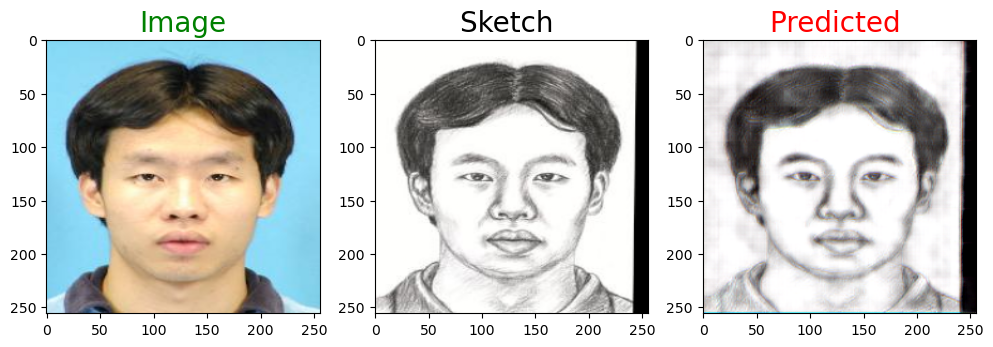

1/1 [==============================] - 0s 20ms/step


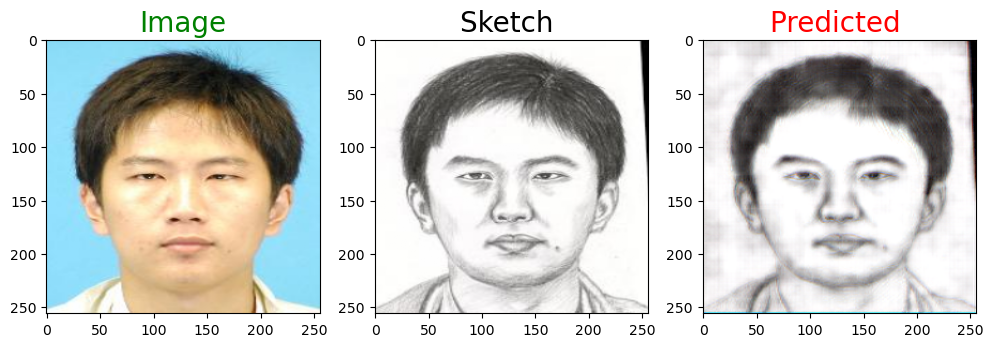

1/1 [==============================] - 0s 21ms/step


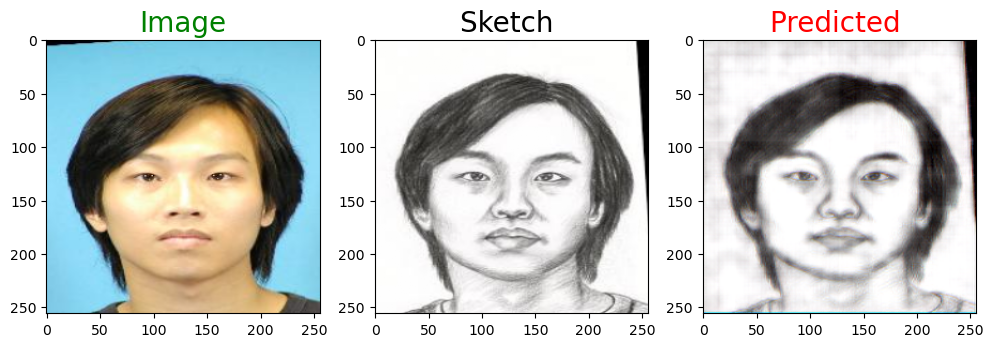

1/1 [==============================] - 0s 20ms/step


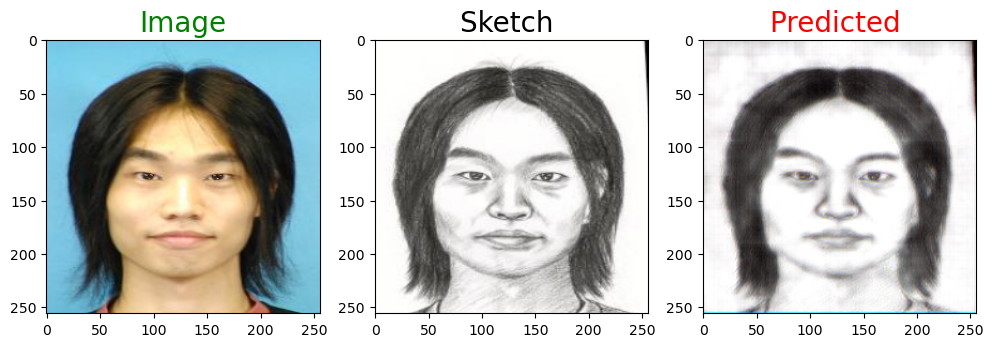

In [28]:
for i in range(0,40,8):
    predicted = np.clip(model.predict(test_sketch_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_image[i],test_sketch_image[i],predicted)